   #  <center>Analysis of Significant Earthquakes from 1965 - 2016 </center>
   
   ## <center>Magnitude greater than 5.5</center>
   
### Columns:
1. Date
2. Time
3. Latitude
4. Longitude
5. Type
6. Depth - Depth at which earthquake occurred
7. Depth Error -  +1/-1 or 2km is negligible
8. Depth Seismic Stations - Stations at a certain depth where earthquakes are recorded
9. Magnitude
 Magnitude Type can be based on any of the following:
 1.   ML: Local (Richter) magnitude    -   The Richter magnitude of an earthquake is determined from the logarithm of the                                                  amplitude of waves recorded by seismographs.
 2.   MS: surface wave magnitude scale -   It is based on measurements in Rayleigh surface waves that travel primarily along                                              the uppermost layers of the Earth.
 3.   MB (Mb): Body wave magnitude scale - It calculates the magnitude of primary or P and secondary or S, seismic waves                                                  traveling within Earth
 4.   MW (Mw): Moment magnitude scale -    It is a measure of an earthquake's magnitude ("size" or strength) based on its                                                  seismic moment (a measure of the "work" done by the earthquake).
 5.   MD (Md): Duration magnitude/signal duration -  It is based on the realization that on a recorded earthquake seismogram,                                                        the total length of the seismic wavetrain ,reflects it's size.
10. Magnitude Error
11. Magnitude Seismic Stations
12. Azimuthal Gap
13. Horizontal Distance
14. Horizontal Error
15. Root Mean Square
16. ID
17. Source
18. Location Source
19. Magnitude Source
20. Status

In this project,we will use Folium to analyze the dataset. Folium is a Python Library that can allow us to visualize spatial data in an interactive manner, straight within the notebooks environment. The library is highly intuitive to use, and it offers a high degree of interactivity.

## Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import folium
from folium.plugins import HeatMap
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
%matplotlib inline

## Get the Data

In [5]:
earth_quake=pd.read_csv("dataset.csv")

In [6]:
earth_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [7]:
earth_quake.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


## Data Exploration

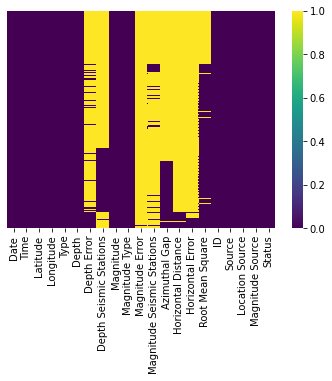

In [8]:
sns.heatmap(earth_quake.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.savefig('null_heatmap')

In [9]:
earth_quake.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [10]:
earth_quake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

## Data Cleaning and Modifying

In [11]:
earth_quake.drop(['ID'],inplace=True,axis=1)
earth_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic


In [12]:
# Fill NULL values with 0
earth_quake[["Depth Error","Depth Seismic Stations","Magnitude Error", "Magnitude Seismic Stations","Azimuthal Gap","Horizontal Distance","Horizontal Error","Root Mean Square"]]  = earth_quake[["Depth Error","Depth Seismic Stations","Magnitude Error", \
"Magnitude Seismic Stations","Azimuthal Gap","Horizontal Distance","Horizontal Error","Root Mean Square"]].fillna(0)
earth_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,0.0,0.0,6.0,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,0.0,0.0,5.8,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,0.0,0.0,6.2,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,0.0,0.0,5.8,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,0.0,0.0,5.8,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic


In [13]:
earth_quake['Date'] = pd.to_datetime(earth_quake['Date'],utc=True)

In [14]:
# Fetched Year and Month from the date column
earth_quake['Year'],earth_quake['Month']= earth_quake['Date'].dt.year, earth_quake['Date'].dt.month
earth_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status,Year,Month
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,0.0,0.0,6.0,MW,...,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,0.0,0.0,6.2,MW,...,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1


In [15]:
earth_quake['coord']=list(zip(round(earth_quake.Latitude,3),round(earth_quake.Longitude,3)))
# zip the lat and lng to make a new series
earth_quake.head(10) 

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status,Year,Month,coord
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,0.0,0.0,6.0,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(19.246, 145.616)"
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(1.863, 127.352)"
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,0.0,0.0,6.2,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-20.579, -173.972)"
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-59.076, -23.557)"
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(11.938, 126.427)"
5,1965-01-10 00:00:00+00:00,13:36:32,-13.405,166.629,Earthquake,35.0,0.0,0.0,6.7,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-13.405, 166.629)"
6,1965-01-12 00:00:00+00:00,13:32:25,27.357,87.867,Earthquake,20.0,0.0,0.0,5.9,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(27.357, 87.867)"
7,1965-01-15 00:00:00+00:00,23:17:42,-13.309,166.212,Earthquake,35.0,0.0,0.0,6.0,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-13.309, 166.212)"
8,1965-01-16 00:00:00+00:00,11:32:37,-56.452,-27.043,Earthquake,95.0,0.0,0.0,6.0,MW,...,0.0,0.0,0.0,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,1965,1,"(-56.452, -27.043)"
9,1965-01-17 00:00:00+00:00,10:43:17,-24.563,178.487,Earthquake,565.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-24.563, 178.487)"


In [16]:
#for x,y in earth_quake['coord']:
'''c=(19.246,145.616)
g = geocoder.osm(c, method='reverse')   
earth_quake['Country']=print(g.json['country'])'''


'''geo = geocoder.osm([-24.563,178.487], method='reverse')
print(geo.json['country']) # Prints Edmonton'''

"geo = geocoder.osm([-24.563,178.487], method='reverse')\nprint(geo.json['country']) # Prints Edmonton"

In [16]:
'''g = geocoder.osm([-59.076,-23.557], method='reverse')
print(g.json['country']) # Prints Edmonton'''

'''results = Geocoder.reverse_geocode(-59.076,-23.557)
results.country'''



'''location = Geocoder.reverse_geocode(12.9716,77.5946,sensor=True)
print ("City:",location.city)
print ("Country:",location.country)'''

'location = Geocoder.reverse_geocode(12.9716,77.5946,sensor=True)\nprint ("City:",location.city)\nprint ("Country:",location.country)'

## Explolatory Data Analysis (EDA)

In [17]:
acc2=earth_quake.groupby('Magnitude Type').count()['Year']
acc2

Magnitude Type
MB     3761
MD        6
MH        5
ML       77
MS     1702
MW     7722
MWB    2458
MWC    5669
MWR      26
MWW    1983
Name: Year, dtype: int64

<AxesSubplot:title={'center':'Percent of TYpes of Magnitudes'}, ylabel='Year'>

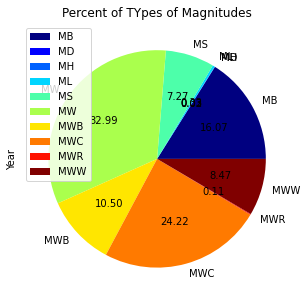

In [18]:
acc2.plot(kind='pie', figsize=(5,5), cmap='jet', autopct='%.2f', title='Percent of TYpes of Magnitudes',legend=True)

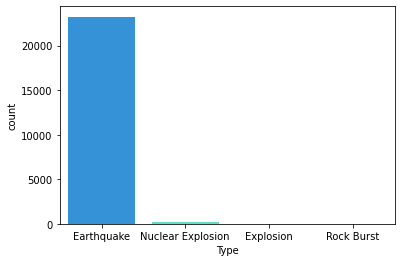

In [19]:
sns.countplot(data=earth_quake,x='Type',palette='rainbow')
# Hence, most of them are of type earthquake
plt.savefig('Type of Earthquake')

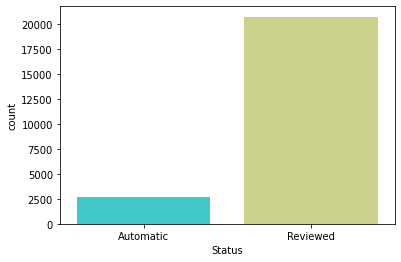

In [20]:
sns.countplot(data=earth_quake,x='Status',palette='rainbow')
plt.savefig("Status of the earthquake")

## Range of Magnitudes is between 5.5 to 9.1

/home/avani/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


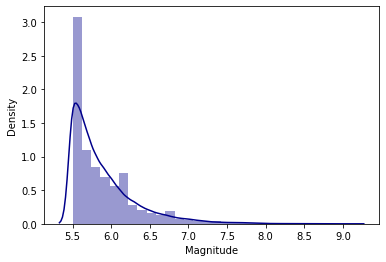

In [21]:
sns.distplot(earth_quake['Magnitude'].dropna(),kde=True,color='darkblue',bins=30)
# bins= no. of bars in the histogram
# kde -> kernel density estimation -> true shape to the plot
plt.savefig('Magnitude distribution with Kernel Density Estimation')

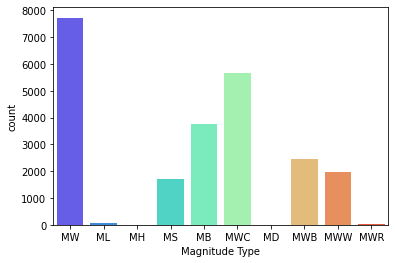

In [24]:
sns.countplot(data=earth_quake,x='Magnitude Type',palette='rainbow')
plt.savefig('Magnitude Type')

In [26]:
#earth_quake.groupBy(['Year', floor(Year/10)
#earth_quake.groupby((earth_quake.index.year//10)*10)

/home/avani/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


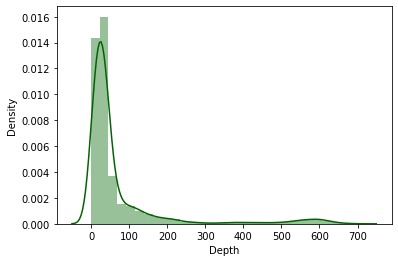

In [27]:
sns.distplot(earth_quake['Depth'].dropna(),kde=True,color='darkgreen',bins=30)
plt.savefig("depth_plot")

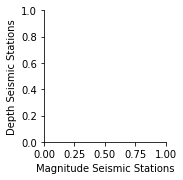

In [29]:
seismic=pd.DataFrame(earth_quake,columns=['Magnitude Seismic Stations','Depth Seismic Stations'])
seismic.tail()
sns.pairplot(seismic,x_vars='Magnitude Seismic Stations',y_vars='Depth Seismic Stations') 
# Magnitude and depth is corrlated positively. But, outliers do exist. 
plt.savefig('seismic_pairplot')

In [30]:
earth_quake['Latitude'].mode()

0    -5.902
1    -5.605
2    -5.589
3    51.500
dtype: float64

In [31]:
earth_quake['Longitude'].mode()

0    126.777
dtype: float64

In [32]:
locations = earth_quake[['Latitude', 'Longitude']]
locationlist = locations.values.tolist() # convert into a list
len(locationlist)

23412

In [33]:
earth_quake['Magnitude'].max()

9.1

In [34]:
earth_quake[earth_quake['Magnitude']>8]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status,Year,Month,coord
11,1965-01-24 00:00:00+00:00,0:11:17,-2.6080,125.9520,Earthquake,20.00,0.0,0.0,8.2,MW,...,0.000,0.0,0.00,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-2.608, 125.952)"
16,1965-02-04 00:00:00+00:00,5:01:22,51.2510,178.7150,Earthquake,30.30,0.0,0.0,8.7,MW,...,0.000,0.0,0.00,OFFICIAL,ISCGEM,OFFICIAL,Automatic,1965,2,"(51.251, 178.715)"
538,1966-10-17 00:00:00+00:00,21:42:00,-10.6650,-78.2280,Earthquake,40.00,0.0,0.0,8.1,MW,...,0.000,0.0,0.00,ISCGEM,ISCGEM,ISCGEM,Automatic,1966,10,"(-10.665, -78.228)"
911,1968-05-16 00:00:00+00:00,0:49:02,40.8600,143.4350,Earthquake,29.90,0.0,0.0,8.2,MW,...,0.000,0.0,0.00,ISCGEM,ISCGEM,ISCGEM,Automatic,1968,5,"(40.86, 143.435)"
2008,1971-07-26 00:00:00+00:00,1:23:22,-4.8170,153.1720,Earthquake,40.00,0.0,0.0,8.1,MW,...,0.000,0.0,0.00,ISCGEM,ISCGEM,ISCGEM,Automatic,1971,7,"(-4.817, 153.172)"
9484,1989-05-23 00:00:00+00:00,10:54:46,-52.3410,160.5680,Earthquake,10.00,0.0,0.0,8.2,MW,...,0.000,0.0,1.30,US,US,PAR,Reviewed,1989,5,"(-52.341, 160.568)"
11959,1994-06-09 00:00:00+00:00,0:33:16,-13.8410,-67.5530,Earthquake,631.30,0.0,0.0,8.2,MW,...,0.000,0.0,1.10,US,US,HRV,Reviewed,1994,6,"(-13.841, -67.553)"
12119,1994-10-04 00:00:00+00:00,13:22:56,43.7730,147.3210,Earthquake,14.00,4.7,0.0,8.3,MW,...,0.000,0.0,0.90,US,US,HRV,Reviewed,1994,10,"(43.773, 147.321)"
12892,1996-02-17 00:00:00+00:00,5:59:31,-0.8910,136.9520,Earthquake,33.00,0.0,0.0,8.2,MW,...,0.000,0.0,1.30,US,US,HRV,Reviewed,1996,2,"(-0.891, 136.952)"
13925,1998-03-25 00:00:00+00:00,3:12:25,-62.8770,149.5270,Earthquake,10.00,0.0,0.0,8.1,MWC,...,0.000,0.0,1.10,US,US,HRV,Reviewed,1998,3,"(-62.877, 149.527)"


In [35]:
def generateBaseMap(default_location=[51.500,126.777], default_zoom_start=3):
    base1_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base1_map

base1_map=generateBaseMap()

folium.Marker(location=[-2.6080,125.9520],popup='Magnitude : 8.2 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[51.2510,178.7150],popup='Magnitude : 8.7 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[-10.6650,-78.2280],popup='Magnitude : 8.1 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[40.8600,143.4350],popup='Magnitude : 8.2 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[-4.8170,153.1720],popup='Magnitude : 8.1 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[-52.3410,160.5680],popup='Magnitude : 8.2 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[-13.8410,-67.5530],popup='Magnitude : 8.2 \n ',tooltip='Click for more information').add_to(base1_map)

folium.Marker(location=[2.3270,93.0630],popup='Magnitude : 8.6 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[54.8920,153.2210],popup='Magnitude : 8.3 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[-36.1220,-72.8980],popup='Magnitude : 8.8 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[-16.2650,-73.6410],popup='Magnitude : 8.4 \n ',tooltip='Click for more information').add_to(base1_map)
folium.Marker(location=[46.2430,154.5240],popup='Magnitude : 8.1 \n ',tooltip='Click for more information').add_to(base1_map)
base1_map 
# Earth_quake with magnitude greater than 8

In [36]:
base1_map.save('greater_8.html')

In [37]:
btw=earth_quake[(earth_quake['Magnitude']>5.5) & (earth_quake['Magnitude']<8)]
btw

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status,Year,Month,coord
0,1965-01-02 00:00:00+00:00,13:44:18,19.2460,145.6160,Earthquake,131.6,0.0,0.0,6.0,MW,...,0.000,0.0,0.0000,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(19.246, 145.616)"
1,1965-01-04 00:00:00+00:00,11:29:49,1.8630,127.3520,Earthquake,80.0,0.0,0.0,5.8,MW,...,0.000,0.0,0.0000,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(1.863, 127.352)"
2,1965-01-05 00:00:00+00:00,18:05:58,-20.5790,-173.9720,Earthquake,20.0,0.0,0.0,6.2,MW,...,0.000,0.0,0.0000,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-20.579, -173.972)"
3,1965-01-08 00:00:00+00:00,18:49:43,-59.0760,-23.5570,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.000,0.0,0.0000,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(-59.076, -23.557)"
4,1965-01-09 00:00:00+00:00,13:32:50,11.9380,126.4270,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.000,0.0,0.0000,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,"(11.938, 126.427)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23405,2016-12-27 00:00:00+00:00,23:20:56,45.7192,26.5230,Earthquake,97.0,1.8,0.0,5.6,MWW,...,0.465,5.1,0.7800,US,US,US,Reviewed,2016,12,"(45.719, 26.523)"
23406,2016-12-28 00:00:00+00:00,8:18:01,38.3754,-118.8977,Earthquake,10.8,1.3,34.0,5.6,ML,...,0.132,0.0,0.1988,NN,NN,NN,Reviewed,2016,12,"(38.375, -118.898)"
23407,2016-12-28 00:00:00+00:00,8:22:12,38.3917,-118.8941,Earthquake,12.3,1.2,40.0,5.6,ML,...,0.120,0.0,0.1898,NN,NN,NN,Reviewed,2016,12,"(38.392, -118.894)"
23409,2016-12-28 00:00:00+00:00,12:38:51,36.9179,140.4262,Earthquake,10.0,1.8,0.0,5.9,MWW,...,0.992,4.8,1.5200,US,US,US,Reviewed,2016,12,"(36.918, 140.426)"


In [38]:
#subset_of_df = df.sample(n=500)
some_map = folium.Map(location=[btw['Latitude'].mean(), 
                                btw['Longitude'].mean()], 
                      zoom_start=3)
folium.Marker(location=[19.2460,145.6160],popup='Magnitude : 6.0 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[1.8630,127.3520],popup='Magnitude : 5.8 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-20.5790,-173.9720],popup='Magnitude : 6.2 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-59.0760,-23.5570],popup='Magnitude : 5.8 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-59.0760,-23.5570],popup='Magnitude : 5.8 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-13.4050,166.6290],popup='Magnitude : 6.7 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[27.3570,87.86700],popup='Magnitude : 5.9 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-13.3090,166.2120],popup='Magnitude : 6.0 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-56.4520,-27.0430],popup='Magnitude : 6.0 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-24.5630,178.4870],popup='Magnitude : 5.8 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-6.8070,108.9880],popup='Magnitude :5.9 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-18.6970,-177.8640],popup='Magnitude : 5.6 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[51.6390,175.0550],popup='Magnitude : 6.0 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[52.5280,172.0070],popup='Magnitude : 5.7 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[51.6260,175.7460],popup='Magnitude : 5.8 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[51.0370,177.8480],popup='Magnitude : 5.9 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[51.7300,173.9750],popup='Magnitude : 5.9 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[51.7750,173.0580],popup='Magnitude : 5.7 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[52.6110,172.5880],popup='Magnitude : 5.7 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[51.8310,174.3680],popup='Magnitude : 5.7 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-10.8416,161.3137],popup='Magnitude : 6.5 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-10.7490,161.1316],popup='Magnitude : 6.9 \n ',tooltip='Click for more information',radius=15).add_to(some_map)
folium.Marker(location=[-9.0283,118.6639],popup='Magnitude : 6.3 \n ',tooltip='Click for more information',radius=15).add_to(some_map)

some_map

In [39]:
some_map.save('btw.html')

In [40]:
def generateBaseMap(default_location=[38.2970,142.3730], default_zoom_start=3):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map=generateBaseMap()
base_map


In [41]:
folium.Marker(location=[38.2970,142.3730],popup='Maximum Magnitude :9.1 \n ',tooltip='Click for more information',radius=15).add_to(base_map)
folium.Marker(location=[3.2950,95.9820],popup='Maximum Magnitude :9.1 \n ',tooltip='Click for more information',radius=15).add_to(base_map)
base_map

In [42]:
base_map.save('Max1.html')

In [43]:
y=earth_quake.groupby('Year').count()['Magnitude']
y

Year
1965    339
1966    234
1967    255
1968    305
1969    323
1970    345
1971    386
1972    388
1973    401
1974    361
1975    412
1976    457
1977    425
1978    410
1979    356
1980    348
1981    321
1982    346
1983    453
1984    482
1985    476
1986    485
1987    505
1988    489
1989    480
1990    528
1991    429
1992    533
1993    466
1994    508
1995    591
1996    541
1997    456
1998    388
1999    446
2000    553
2001    443
2002    444
2003    485
2004    571
2005    533
2006    508
2007    608
2008    508
2009    517
2010    560
2011    713
2012    445
2013    461
2014    480
2015    446
2016    469
Name: Magnitude, dtype: int64

In [44]:
hm_wide = HeatMap( list(zip(earth_quake.Latitude.values, earth_quake.Longitude.values)),
                     min_opacity=0.2,
                     radius=17, blur=15,
                     max_zoom=1 
                 )

In [45]:
#hmap = folium.Map(location=ny_coord, zoom_start=12)

def generateBaseMap(default_location=[51.500,126.777], default_zoom_start=3):
    base2_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base2_map

base2_map=generateBaseMap()

hm_wide = HeatMap( zip(earth_quake.Latitude.values, earth_quake.Longitude.values),
                     min_opacity=0.2,
                     radius=17, blur=15,
                     max_zoom=1
                 )
base2_map.add_child(hm_wide)


In [46]:
base2_map.save('heatmap.html')